In [1]:
import pandas as pd
dt = pd.read_csv('Sf_complete.csv')

<AxesSubplot:>

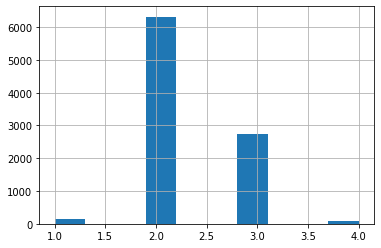

In [5]:
dt.Severity.hist()

In [2]:
def repeatStr(s):
    res = ''
    for i in range(200//len(s)):
        res=res+'@'+s
    res = res+'@'+s
    return res[:200]

In [3]:
import numpy as np

In [4]:
# X = dt.Description.apply(lambda v: (v+'!').ljust(200, ' ')).values

In [5]:
X = dt.Description.apply(lambda v: repeatStr(v)).values

In [6]:
Y = dt.Severity.astype(np.float64)

In [7]:
X[0]

'@Accident on I-280 Northbound at Geneva Ave.@Accident on I-280 Northbound at Geneva Ave.@Accident on I-280 Northbound at Geneva Ave.@Accident on I-280 Northbound at Geneva Ave.@Accident on I-280 North'

In [8]:
cc = list(set(' '.join(X.ravel())))

In [9]:
def num2bin(num):
    return list(map(lambda v: int(v), bin(10000+num).replace('0b','')))
def num2uni(num):
    res = np.zeros(82)
    res[num]=1
    return res

In [10]:
DICT={}


In [11]:
cc=sorted(cc)

In [12]:
for i in range(len(cc)):
    DICT[cc[i]] = num2bin(i)

In [13]:
import numpy as np
ARR=[]
for i in range(len(X)):
    TMP=[]
    for j in range(len(X[i])):
        TMP.append(DICT[X[i][j]])
    ARR.append(TMP)
ARR=np.array(ARR)
ARR.shape

(9275, 200, 14)

In [14]:
ARR[0]

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]])

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = keras.Sequential()

model.add(layers.LSTM(80,input_shape=(200,14,),return_sequences=False))
# model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(optimizer="adam", loss="mse", metrics=["mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80)                30400     
_________________________________________________________________
dense (Dense)                (None, 12)                972       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 31,385
Trainable params: 31,385
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(Xtr,Ytr,epochs=20, validation_split=0.2)

NameError: name 'Xtr' is not defined

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


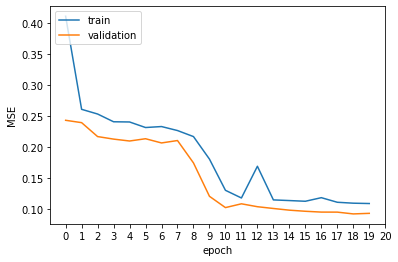

In [60]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 21, step=1))
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
plt.savefig('LSTM.pdf',format='pdf')

In [32]:
from sklearn.model_selection import train_test_split as tts

In [35]:
Xtr,Xte,Ytr,Yte = tts(ARR,Y,test_size=0.1)

In [47]:
pred = model.predict(Xte)

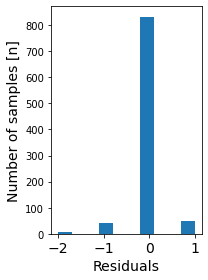

In [59]:
plt.figure(figsize=(3,4))
plt.hist(np.round(pred.ravel()-Yte,0))
plt.ylabel('Number of samples [n]',fontsize=14)
plt.xticks(np.arange(-2,2),fontsize=14)
plt.xlabel('Residuals',fontsize=14)
plt.tight_layout()
plt.savefig('LSTM_res.pdf',format='pdf')

In [19]:
import matplotlib.pyplot as plt
# plt.hist((-Y).ravel().ravel())

In [163]:
model = keras.Sequential()

model.add(layers.LSTM(64,input_shape=(200,90,), return_sequences=False))
model.add(Dense(i,activation=act))
model.add(layers.RepeatVector(200))
model.add(LSTM(64, return_sequences=True,activation='sigmoid'))
model.add(layers.TimeDistributed(Dense(90)))

model.compile(optimizer="adam", loss="mse", metrics=["mse"])
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 64)                39680     
_________________________________________________________________
dense_129 (Dense)            (None, 9274)              602810    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 200, 9274)         0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 200, 64)           2390784   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 200, 90)           5850      
Total params: 3,039,124
Trainable params: 3,039,124
Non-trainable params: 0
_________________________________________________________________


9274

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

for i in [4,8,12,16]:
    for act in ['elu','sigmoid','tanh','relu']:
        print(i,act)
        print('')
        
        model = keras.Sequential()

        
#         model.add(layers.LSTM(64,input_shape=(200,82,), return_sequences=False))
#         model.add(Dense(i,activation=act))
#         model.add(layers.RepeatVector(200))
#         model.add(LSTM(64, return_sequences=True,activation='sigmoid'))
#         model.add(layers.TimeDistributed(Dense(90,activation='relu')))

#         model.compile(optimizer="adam", loss="mse", metrics=["mse"])
        
        model.add(layers.LSTM(128,input_shape=(200,14,),return_sequences=False))
        # model.add(Dense(24,activation='relu'))
        model.add(Dense(i,activation=act,trainable=False))
        model.add(Dense(1,activation='relu'))

        model.compile(optimizer="adam", loss="mse", metrics=["mse"])
        
        model.summary()

        model.fit(ARR,Y,epochs=4)
        sencoder = keras.Model(model.input,model.layers[1].output)
        preds = sencoder.predict(ARR)
        
        xt = pd.DataFrame(preds,columns=list(map(lambda v: 'LSTMSENT-{}-{}-'.format(i,act)+str(v), list(range(i)))))
        xt['ID'] = dt.ID
        xt.to_csv('LSTMSENT-{}-{}.csv'.format(i,act),index=False)
        
#         break
#         sencoder.save('lstm-{}-{}'.format(i,act))
#         sencoder.summary()


4 elu

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 128)               73216     
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 516       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 73,737
Trainable params: 73,221
Non-trainable params: 516
_________________________________________________________________
Epoch 1/4
290/290 [==============================] - 23s 74ms/step - loss: 0.3269 - mse: 0.3269
Epoch 2/4
290/290 [==============================] - 22s 75ms/step - loss: 0.2540 - mse: 0.2540
Epoch 3/4
290/290 [==============================] - 22s 76ms/step - loss: 0.2469 - mse: 0.2469
Epoch 4/4
290/290 [==============================] - 22s 76ms/step - loss: 0.2373 

290/290 [==============================] - 22s 73ms/step - loss: 0.4047 - mse: 0.4047
Epoch 2/4
290/290 [==============================] - 22s 75ms/step - loss: 0.2582 - mse: 0.2582
Epoch 3/4
290/290 [==============================] - 22s 75ms/step - loss: 0.2579 - mse: 0.2579
Epoch 4/4
290/290 [==============================] - 22s 76ms/step - loss: 0.2579 - mse: 0.2579
12 elu

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 128)               73216     
_________________________________________________________________
dense_70 (Dense)             (None, 12)                1548      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 13        
Total params: 74,777
Trainable params: 73,229
Non-trainable params: 1,548
___________________________________________________________

In [138]:
plt.hist(Y)

array([[0.6655556 , 0.562955  , 0.4658666 , ..., 0.69831014, 0.5202728 ,
        0.582043  ],
       [0.6655556 , 0.562955  , 0.4658666 , ..., 0.69831014, 0.5202728 ,
        0.582043  ],
       [0.66555554, 0.562955  , 0.4658666 , ..., 0.69831014, 0.52027273,
        0.582043  ],
       ...,
       [0.6655556 , 0.562955  , 0.4658666 , ..., 0.69831014, 0.5202728 ,
        0.582043  ],
       [0.6655556 , 0.562955  , 0.4658666 , ..., 0.69831014, 0.52027273,
        0.582043  ],
       [0.6655556 , 0.562955  , 0.4658666 , ..., 0.69831014, 0.5202728 ,
        0.582043  ]], dtype=float32)

0           A-736
1           A-766
2           A-767
3           A-789
4           A-809
          ...    
9270    A-4238909
9271    A-4238914
9272    A-4238922
9273    A-4238924
9274    A-4239358
Name: ID, Length: 9275, dtype: object

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4_input (InputLayer)    [(None, 200, 81)]         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                37376     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 37,506
Trainable params: 37,506
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.predict(ARR[:1])

array([[[0.5219948 , 0.42078584, 0.3948026 , ..., 0.39510217,
         0.40439147, 0.405386  ],
        [0.5551658 , 0.30712152, 0.2560842 , ..., 0.26228344,
         0.2776399 , 0.28131783],
        [0.6063031 , 0.1566638 , 0.10851309, ..., 0.11578274,
         0.12909678, 0.13479462],
        ...,
        [0.751394  , 0.01642355, 0.00811583, ..., 0.00831681,
         0.0107787 , 0.01318008],
        [0.751394  , 0.01642355, 0.00811583, ..., 0.00831681,
         0.0107787 , 0.01318008],
        [0.751394  , 0.01642355, 0.00811583, ..., 0.00831681,
         0.0107787 , 0.01318008]]], dtype=float32)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27_input (InputLayer)   (None, 200, 80)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 80)                51520     
_________________________________________________________________
dense_16 (Dense)             (None, 12)                972       
Total params: 52,492
Trainable params: 52,492
Non-trainable params: 0
_________________________________________________________________


In [30]:
code = sencoder.predict(ARR)

In [31]:
code.shape

(9275, 12)

In [34]:
LX = pd.DataFrame(code,columns=list(map(lambda v: 'LSTM'+str(v), list(range(12)))))

In [35]:
LX['ID'] = dt['ID']

In [37]:
LX.to_csv('lstm.csv',index=False)